<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Support Vector Machines - Classification PostClass</strong></p> 

1. Some Usage Areas of SVM Classification Problems:
    - Text Classification
    - Pattern Recognition
    - Image-based Gender Detection  
2. "C" ve "gamma"  SVM'de iki önemli parametredir ve margin'i belirler.
    - "C" küçüldükçe margin büyür. Margin büyükse soft margin denir. Default değeri 1'dir.
    - "C" büyüdükçe overfitting' gitme ihtimali artar. "C" mümkün oldukça küçük olmalı.
3. SVM arkaplanda L2(Ridge) normu çalıştırarak overfitting ile mücadele eder.
4. **Kernel Trick :** Datalar 2 boyutlu düzlemde ayrılamıyorsa kullanılır. Yeni bir boyut ekleyerek datayı ayrılabilir hale getirir.
5. Different Kernel Functions of SVM:
    - Linear
    - Polynomial
    - RBF(Radial Bases Function)
    - Sigmoid
6. Hyperparameters:
    - Kernel :
        - Default değeri "rbf" dir.
        - "linear", "poly", "rbf", "sigmoid", "pre computed".
        - RBF daha esnek ve daha güçlüdür. Ayrıca feature sayısı azken bile iyi sonuç verir.
    - C :
        - Default değeri 1'dir.
        - Penalty parametresidir.
        - Arttıkça overfitting'e gitme ihtimali artar.
        - Çok yüksek bir değer olması tercih edilmez. Mümkün oldukça küçük ve pozitif olması tercih edilir.
        - Margin ile ilgili bir parametredir.
    - gamma :
        - Kernel coefficient for "rbf", "poly" and "sigmoid".
        - Kernella ilgili bir parametredir.
        - gamma değeri yükseldikçe overfitting olma ihtimali artar.
        - "scale", "auto" ya da float bir değer alabilir.
7. SVM Avantajları:
    - Teste yeni data geldiği durumdaki performansı iyidir.
    - En önemli avantajı "kernel trick" dir.
8. SVM Dezavantajları:
    - Parametrelerin düzgün seçilmesi önemli.
    - Outlier değerlere karşı hassas.
    

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

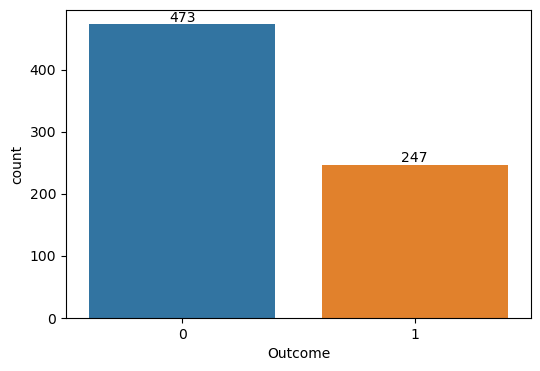

In [31]:
ax = sns.countplot(df.Outcome)
for i in ax.containers:
    ax.bar_label(i)

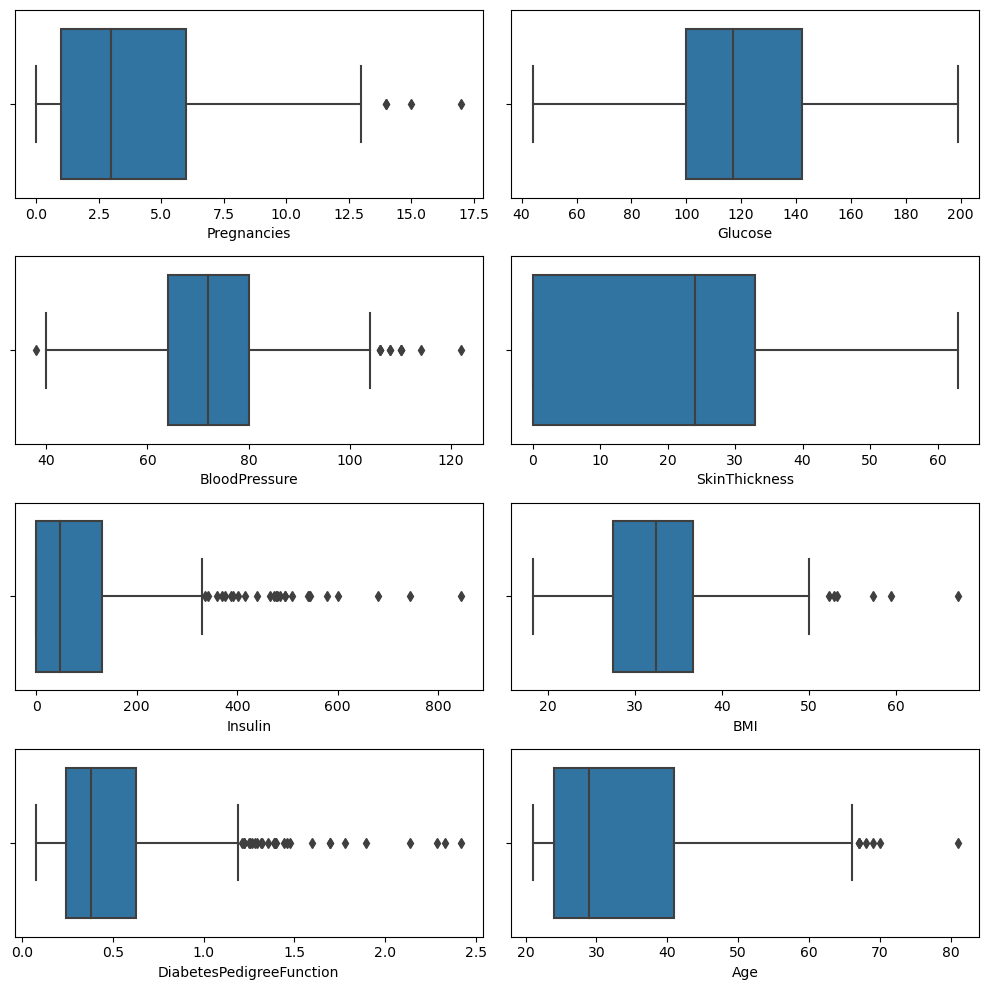

In [38]:
plt.figure(figsize=(10,10))
i = 1
for column in df.drop(columns="Outcome").columns:
    plt.subplot(4,2,i)
    sns.boxplot(df[column])
    i += 1
plt.tight_layout()

In [39]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [40]:
df.shape

(720, 9)

In [42]:
df.Outcome.value_counts()
# Datasetimiz tam anlamıyla balance değil.

0    473
1    247
Name: Outcome, dtype: int64

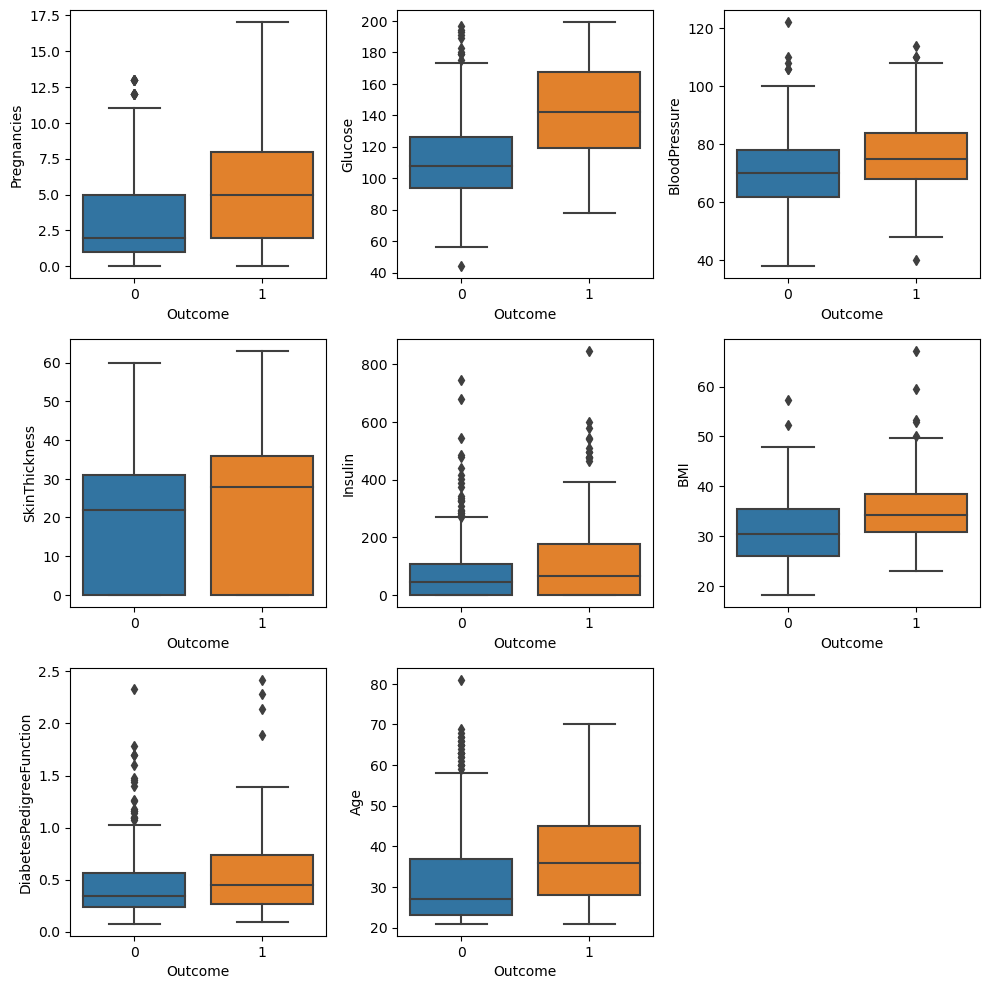

In [47]:
index = 0
plt.figure(figsize=(10,10))
for feature in df.drop(columns="Outcome").columns:
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.tight_layout()

<AxesSubplot:>

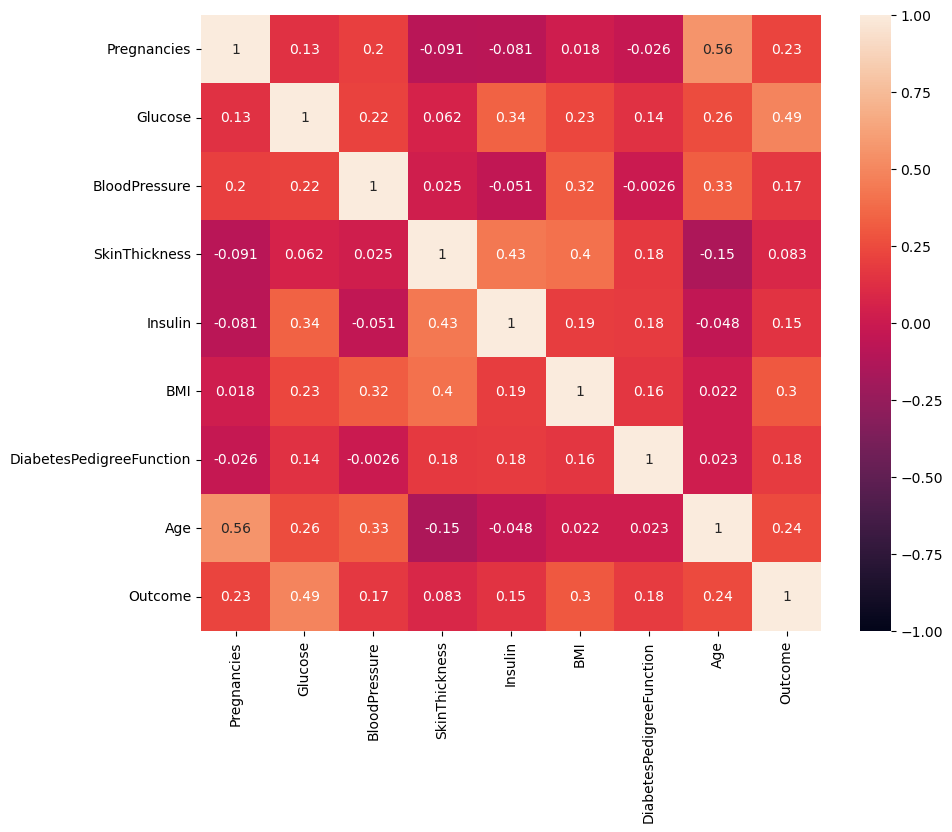

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1)

<AxesSubplot:>

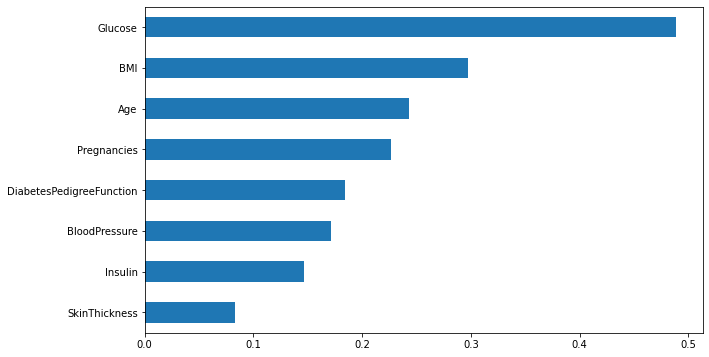

In [27]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

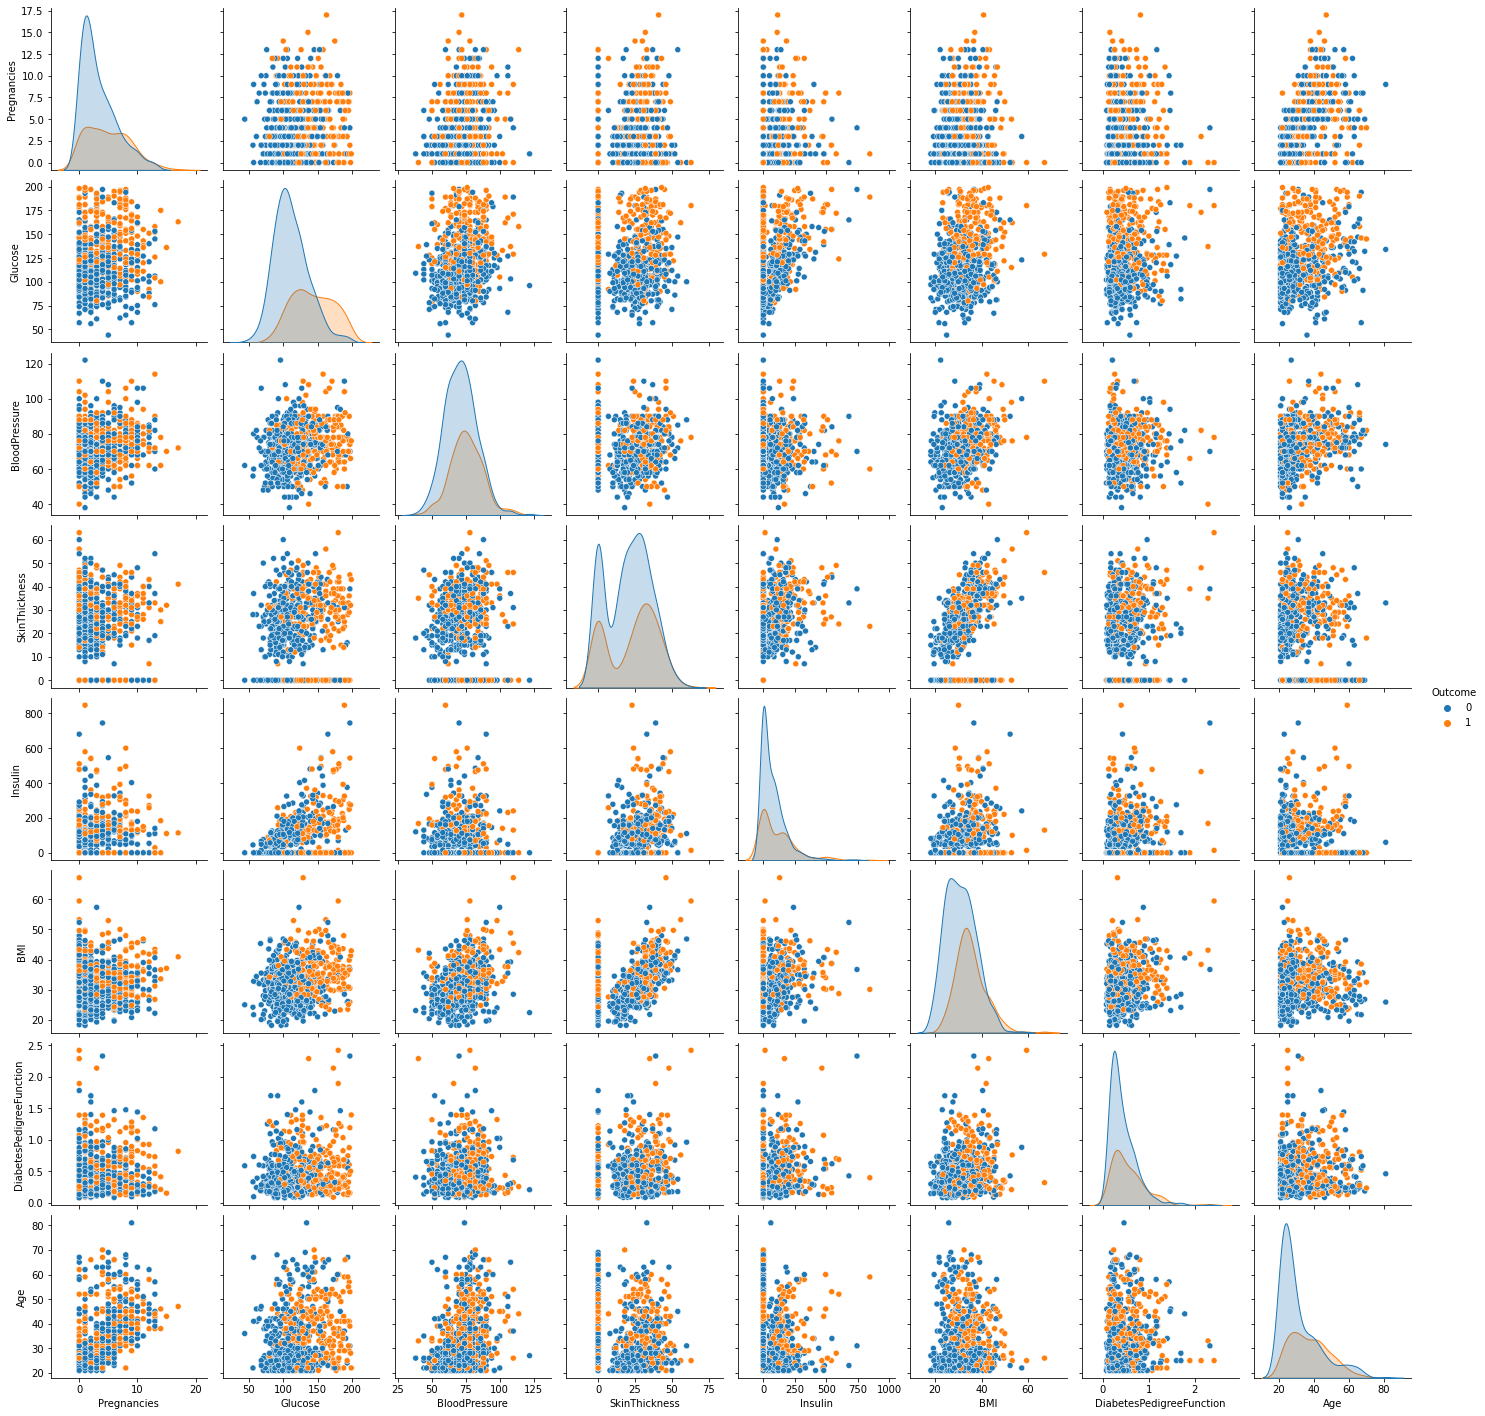

In [28]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
# Burada datasetimiz tam anlamıyla balance olmadığı için stratify=y yazdık.

## Modelling and Model Performance

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Without Scalling

In [55]:
# SVM distance based model olduğu için scaling yapılması gerekir ancak burada karşılaştrıma amaçlı iki türlü deneyeceğiz.

In [56]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [57]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



In [58]:
from sklearn.model_selection import cross_validate

In [63]:
model = SVC(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv= 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.738
test_precision   0.708
test_recall      0.420
test_f1          0.520
dtype: float64

### With Scalling

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [65]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps = operations)

In [66]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(random_state=42))])

In [67]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [68]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.752
test_precision   0.673
test_recall      0.536
test_f1          0.594
dtype: float64

In [69]:
# scaling sonrası skorlarımızda gözle görülür iyileşme oldu..

### With Best Parameters (GridsearchCV)

In [70]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
              'SVC__kernel': ['rbf', 'linear']}

In [97]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True,
                                                        class_weight="balanced",
                                                        random_state=42))]
pipe_model = Pipeline(steps=operations)
# Burada probability = True yaptık çünkü Roc Curve çizdirebilmek için bize olasılıklar lazım.
# Ayrıca class_weight="balanced" yaptık çünkü datamız tam anlamıyla balance durumda değildi.Bunu handle edecek.

svm_model_grid = GridSearchCV(estimator=pipe_model, param_grid=param_grid, scoring="recall", cv= 10, n_jobs=-1)
# Burada scoring="recall" yaptık çünkü burada bir hastalığın teşhisi sözkonousu ve biz hasta olanları kaçırmak istemiyoruz.

In [98]:
%%time
svm_model_grid.fit(X_train, y_train)

CPU times: total: 531 ms
Wall time: 7.76 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3, 0.4, 0.5,
                                        0.6, 0.7, 0.8],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')

In [99]:
svm_model_grid.best_score_

0.97

In [100]:
svm_model_grid.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.7, 'SVC__kernel': 'rbf'}

In [101]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[28 67]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.29      0.45        95
           1       0.42      0.98      0.59        49

    accuracy                           0.53       144
   macro avg       0.69      0.64      0.52       144
weighted avg       0.78      0.53      0.50       144


Train_Set
[[131 247]
 [  5 193]]
              precision    recall  f1-score   support

           0       0.96      0.35      0.51       378
           1       0.44      0.97      0.61       198

    accuracy                           0.56       576
   macro avg       0.70      0.66      0.56       576
weighted avg       0.78      0.56      0.54       576



## Overall performance of the model

In [102]:
# İmbalance datalarda Precision-Recall grafiğine bakmak daha çok tercih edilir.
# Balance datalarda ise Roc Curve' e bakılır.

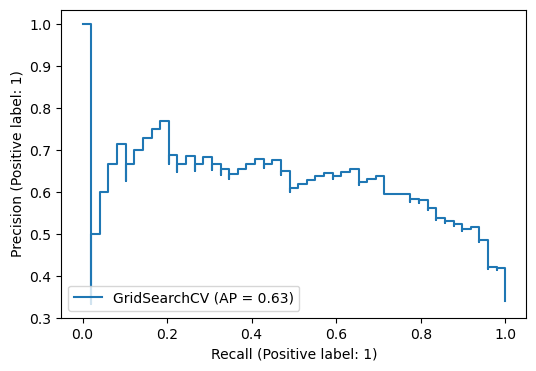

In [108]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, precision_recall_curve
plot_precision_recall_curve(svm_model_grid, X_test, y_test);

## Finding Best Threshold for max f1 score

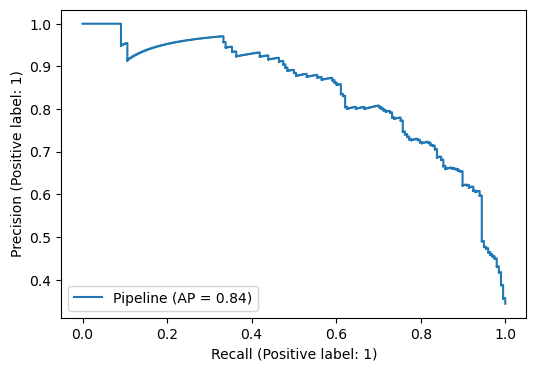

In [105]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)

svc_basic_model.fit(X_train, y_train)
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

In [106]:
y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.8415032373442909

In [113]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [115]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# Burada f1-score'un formülün yazdık ve threshold'lar içinden en uygun olasılık değerini bulduk.
# Modelin default threshold değeri 0.5 idi ancak 0.3' e göre sınıflandırma yapmak bu data için daha iyi sonuç veriyor.

0.3069561306924308

In [116]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
# Burada 0.30'dan büyük olasılığı 1 olarak sınıflandırıyoruz. düşük olanı da 0 ytaptık.

In [117]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[44 51]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62        95
           1       0.48      0.96      0.64        49

    accuracy                           0.63       144
   macro avg       0.72      0.71      0.63       144
weighted avg       0.79      0.63      0.63       144



In [118]:
y_train_pred2 = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[195 183]
 [ 12 186]]
              precision    recall  f1-score   support

           0       0.94      0.52      0.67       378
           1       0.50      0.94      0.66       198

    accuracy                           0.66       576
   macro avg       0.72      0.73      0.66       576
weighted avg       0.79      0.66      0.66       576



In [119]:
# Buradaki sonuçları gridsearch'deki f1 score ile karşılaştırınca burada f1 score'da gelişme olduğunu görüyoruz.